<a href="https://colab.research.google.com/github/DanielFBottega/chords-identifier-TCC/blob/main/Onda_Senoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install librosa --quiet

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [16]:
uploaded = files.upload()
audio_path = list(uploaded.keys())[0]

Saving A7 Chord.mp3 to A7 Chord (1).mp3


Sample rate: 44100, Duração: 2.86 segundos


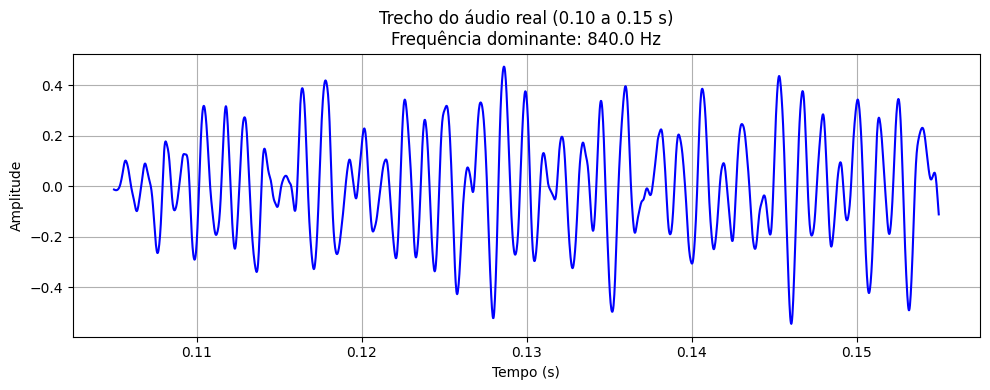

In [54]:
y, sr = librosa.load(audio_path, sr=None)
print(f"Sample rate: {sr}, Duração: {len(y)/sr:.2f} segundos")

start_sec = 0.105 #inicio escolhido
duration_sec = 0.05 #duração do audio
start_sample = int(start_sec * sr)
samples = int(duration_sec * sr)

# Selecionar o trecho
y_segment = y[start_sample : start_sample + samples]

# Vetor de tempo para plotagem
t = np.linspace(start_sec, start_sec + duration_sec, samples, endpoint=False)

# Calcular FFT (mais simples) do trecho
fft = np.fft.fft(y_segment)
fft_magnitude = np.abs(fft)[:samples // 2]  # Magnitude apenas da metade positiva
freqs = np.fft.fftfreq(samples, 1/sr)[:samples // 2]  # Frequências correspondentes

# Frequência dominante (que tem maior magnitude)
dominant_freq = freqs[np.argmax(fft_magnitude)]

# Plotar forma de onda
plt.figure(figsize=(10, 4))
plt.plot(t, y_segment, color='blue')
plt.title(f'Trecho do áudio real ({start_sec:.2f} a {start_sec + duration_sec:.2f} s)\n'
          f'Frequência dominante: {dominant_freq:.1f} Hz')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()